In [3]:
!pip install ppscore

In [4]:
!pip install --upgrade numpy

In [5]:
!pip install --upgrade pandas

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [1]:
# library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps

In [2]:
# load dataset
data =  pd.read_csv('/content/adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# info
data.info()  # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# summary
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Check for '?' in object columns (usually a placeholder for missing values)
missing_vals = data.isin(['?']).sum()
missing_vals

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
# Drop rows with missing values as they are likely few and categorical (not suitable for imputation)
data_cleaned = data.dropna().reset_index(drop=True)
data_cleaned.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Select numerical features for scaling
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numerical_data = data_cleaned[numerical_cols]
numerical_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [8]:
# Apply StandardScaler
standard_scaled = pd.DataFrame(StandardScaler().fit_transform(numerical_data), columns=[f"{col}_std" for col in numerical_cols])
standard_scaled

,age_std,fnlwgt_std,education_num_std,capital_gain_std,capital_loss_std,hours_per_week_std
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [9]:
# Apply MinMaxScaler
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(numerical_data), columns=[f"{col}_minmax" for col in numerical_cols])
minmax_scaled

,age_minmax,fnlwgt_minmax,education_num_minmax,capital_gain_minmax,capital_loss_minmax,hours_per_week_minmax
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [10]:
# Combine scaled data for preview
scaled_preview = pd.concat([numerical_data.head(), standard_scaled.head(), minmax_scaled.head()], axis=1)

missing_vals, data_cleaned.shape, scaled_preview

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 income            0
 dtype: int64,
 (32561, 15),
    age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
 0   39   77516             13          2174             0              40   
 1   50   83311             13             0             0              13   
 2   38  215646              9             0             0              40   
 3   53  234721              7             0             0              40   
 4   28  338409             13             0             0              40   
 
     age_std  fnlwgt_std  education_num_std  capital_gain_std  \
 0  0.030671   -1.063611           1.134739          0.148453   
 1  0.837109   -1.008707           1.134739         -0.1

Standard Scaling (Z-score normalization):

Centers data around mean = 0 and std = 1

Good when features follow a Gaussian (normal) distribution

Helps in algorithms that assume this distribution (e.g., Logistic Regression, Linear Regression, SVM, etc.)

Min-Max Scaling:

Scales data to [0, 1]

Preferred for neural networks and algorithms sensitive to magnitude (e.g., KNN, gradient descent-based methods)

Good for maintaining original data distribution

In [11]:
# Identify categorical columns
categorical_cols = data_cleaned.select_dtypes(include='object').columns.tolist()
cat_unique_counts = data_cleaned[categorical_cols].nunique()

In [12]:
# Separate columns by number of categories
onehot_cols = cat_unique_counts[cat_unique_counts < 5].index.tolist()
label_cols = cat_unique_counts[cat_unique_counts >= 5].index.tolist()

In [14]:
# One-Hot Encoding
data_onehot_encoded = pd.get_dummies(data_cleaned[onehot_cols], drop_first=True)
data_onehot_encoded

,sex_ Male,income_ >50K
0,True,False
1,True,False
2,True,False
3,True,False
4,False,False
...,...,...
32556,False,False
32557,True,True
32558,False,False
32559,True,False


In [15]:
# Label Encoding
label_encoded_data = data_cleaned[label_cols].apply(LabelEncoder().fit_transform)
label_encoded_data.head()

,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,1,1,4,39
1,6,9,2,4,0,4,39
2,4,11,0,6,1,4,39
3,4,1,2,6,0,2,39
4,4,9,2,10,5,2,5


In [16]:
# Combine with original DataFrame (dropping original categorical columns)
data_encoded = pd.concat([
    data_cleaned.drop(columns=categorical_cols),
    data_onehot_encoded,
    label_encoded_data
], axis=1)

data_encoded.head(), onehot_cols, label_cols

(   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
 0   39   77516             13          2174             0              40   
 1   50   83311             13             0             0              13   
 2   38  215646              9             0             0              40   
 3   53  234721              7             0             0              40   
 4   28  338409             13             0             0              40   
 
    sex_ Male  income_ >50K  workclass  education  marital_status  occupation  \
 0       True         False          7          9               4           1   
 1       True         False          6          9               2           4   
 2       True         False          4         11               0           6   
 3       True         False          4          1               2           6   
 4      False         False          4          9               2          10   
 
    relationship  race  native_country  
 

Categorical Feature Analysis
We split the categorical features based on the number of unique categories:

One-Hot Encoding applied to:

sex (2 categories)

income (2 categories)

Label Encoding applied to:

workclass (9 categories)

education (16 categories)

marital_status (7 categories)

occupation (15 categories)

relationship (6 categories)

race (5 categories)

native_country (42 categories)

One-Hot Encoding :


*   Creates binary columns for each category
*   Nominal data with few categories
*   	No ordinal relationship assumed, clear and interpretable
*   Increases dimensionality (curse of dimensionality)
* uses logistic regression and trees

Label Encoding :


*   Assigns a unique integer to each category
*   Ordinal data or high cardinality
*   Compact and memory-efficient for many categories
*   May mislead algorithms that interpret numeric order
* uses neural networks




In [17]:
# Copy dataframe for feature engineering
data_fe = data_encoded.copy()

In [18]:
# --- Feature 1: age_bucket ---
# Categorize age into groups: Young (18–30), Adult (31–50), Senior (51+)
data_fe['age_bucket'] = pd.cut(data_cleaned['age'], bins=[17, 30, 50, 90], labels=['Young', 'Adult', 'Senior'])


In [19]:
# Encode the new categorical feature
data_onehot_encoded_fe = pd.concat([data_fe, pd.get_dummies(data_fe['age_bucket'], prefix='age_bucket', drop_first=True)], axis=1)
data_fe.drop(columns='age_bucket', inplace=True)

In [20]:
# --- Feature 2: capital_diff = capital_gain - capital_loss ---
data_fe['capital_diff'] = data_cleaned['capital_gain'] - data_cleaned['capital_loss']

In [21]:
# --- Skewed Feature: Apply log(1 + x) transformation to 'capital_gain' ---
data_fe['capital_gain_log'] = np.log1p(data_cleaned['capital_gain'])

In [22]:
# Check transformed feature stats
capital_gain_stats = {
    "original_skew": data_cleaned['capital_gain'].skew(),
    "log_transformed_skew": data_fe['capital_gain_log'].skew()
}

data_fe[['capital_gain', 'capital_diff', 'capital_gain_log']].describe(), capital_gain_stats

(       capital_gain  capital_diff  capital_gain_log
 count  32561.000000  32561.000000      32561.000000
 mean    1077.648844    990.345014          0.734621
 std     7385.292085   7408.986951          2.454738
 min        0.000000  -4356.000000          0.000000
 25%        0.000000      0.000000          0.000000
 50%        0.000000      0.000000          0.000000
 75%        0.000000      0.000000          0.000000
 max    99999.000000  99999.000000         11.512925,
 {'original_skew': np.float64(11.953847687699799),
  'log_transformed_skew': np.float64(3.096143524467517)})

Feature: age_bucket ---
Why it was created:

While age is a continuous variable, income potential often aligns more closely with life stages:

Young individuals may still be studying or starting out in their careers.

Adults are more likely to be in peak earning years.

Seniors may be nearing retirement or already retired.

Benefit to the model:

Helps algorithms that don’t capture non-linearity well (like logistic regression) by encoding meaningful group differences directly.

Improves interpretability of the impact of age on income.



Feature: capital_diff---
Why it was created:

capital_gain and capital_loss are highly sparse and often zero for most individuals.

Combining them provides a single metric that reflects whether an individual made or lost money from investments, and by how much.

It also simplifies feature space and avoids redundant modeling of two closely related features.

Benefit to the model:

Captures meaningful financial activity in a cleaner, more interpretable form.

Reduces sparsity and dimensionality without losing information.

May help the model learn stronger relationships with income.

In [23]:
# isolationforest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(data_fe)

In [24]:
# Keep only inliers (where prediction == 1)
data_cleaned_outliers = data_fe[outliers == 1]

In [25]:
# Skewed distributions	Affects accuracy of models assuming normality
# Biased parameter estimates	Impacts coefficients in regression-based models
# Incorrect splits	Affects tree-based models, leading to overfitting
# Distance distortion	Degrades performance of KNN, K-means, etc.
# Wider feature ranges	Reduces efficiency of scaling and normalization

In [26]:
# ---------- PPS Matrix ----------
pps_matrix = pps.matrix(data_fe)[['x', 'y', 'ppscore']]

In [27]:
# Pivot for heatmap
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

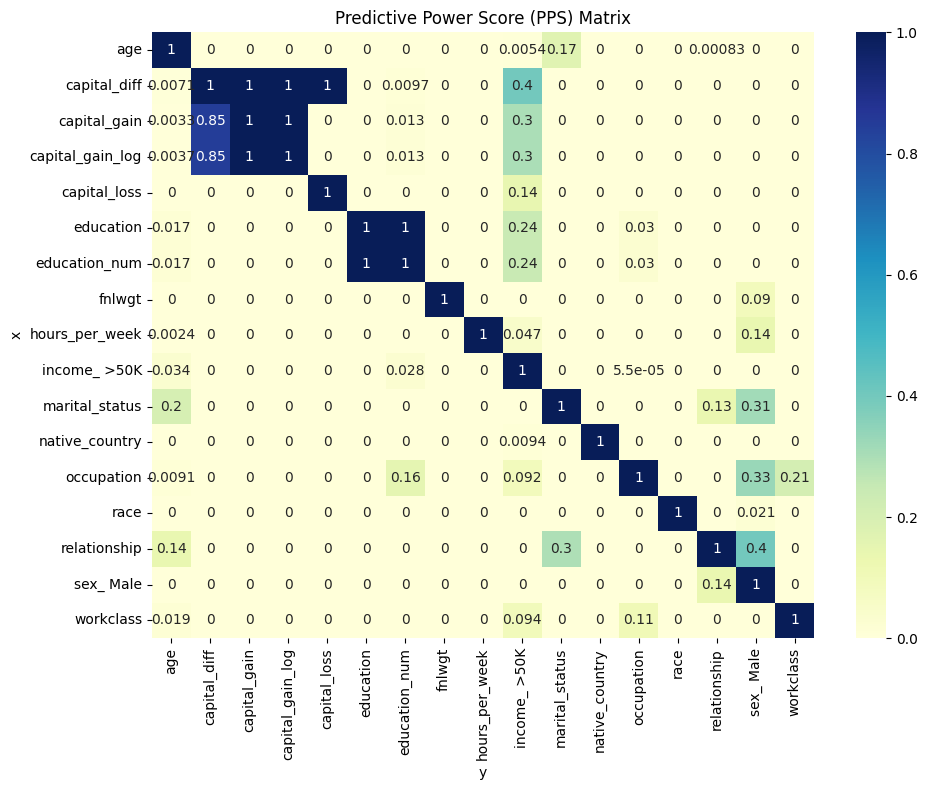

In [35]:
# Plot PPS heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, cmap='YlGnBu', annot=True)
plt.title('Predictive Power Score (PPS) Matrix')
plt.tight_layout()
plt.show()

In [32]:
# ---------- Correlation Matrix ----------
# Only for numerical columns
corr_matrix = data_fe.corr()
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country,capital_diff,capital_gain_log
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.088832,0.234037,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.028718,-0.001151,0.074284,0.124183
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.026858,-0.009463,-0.016656,-0.028145,0.028153,0.001597,0.008931,-0.021291,-0.051966,0.000988,-0.004414
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.012280,0.335154,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.031838,0.050840,0.117891,0.129135
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.048480,0.223329,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.011145,-0.001982,0.998521,0.564520
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.045567,0.150526,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.018899,0.000419,-0.085902,-0.064840
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229309,0.229689,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.041910,-0.002671,0.075207,0.083821
sex_ Male,0.088832,0.026858,0.012280,0.048480,0.045567,0.229309,1.000000,0.215980,0.095981,-0.027356,-0.129314,0.080296,-0.582454,0.087204,-0.008119,0.045846,0.069008
income_ >50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,0.215980,1.000000,0.051604,0.079317,-0.199307,0.075468,-0.250918,0.071846,0.015840,0.214428,0.289462
workclass,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,0.095981,0.051604,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.049742,-0.007690,0.033062,0.022672
education,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,-0.027356,0.079317,0.023513,1.000000,-0.038407,-0.021260,-0.010876,0.014131,0.064288,0.029039,0.024955


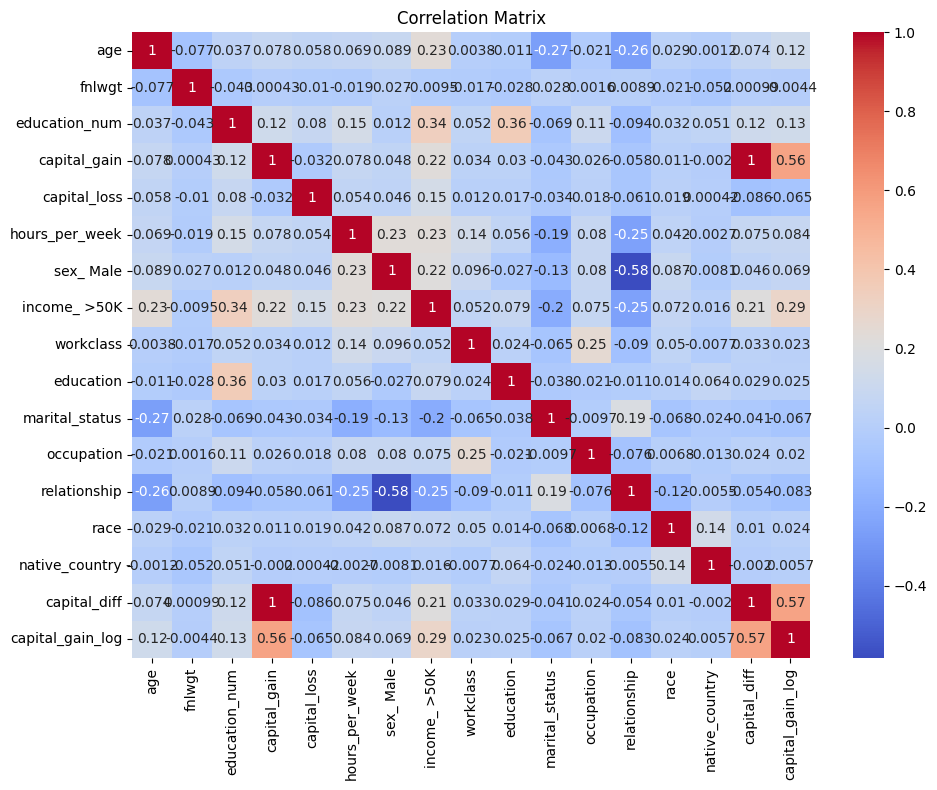

In [36]:
# Plot Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

PPS Heatmap: Shows how well each feature predicts another — works across categorical and numeric features.

Correlation Heatmap: Only shows linear relationships between numeric columns.

Conclusion :
PPS is more useful than correlation when:

You want to assess predictive feature importance.

Your dataset contains categorical variables.

You suspect non-linear interactions.